In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [150]:
data = pd.read_csv("Uni_linear.txt",header=None)

In [151]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [152]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0, 0.5, 'Profit in ($10000)')

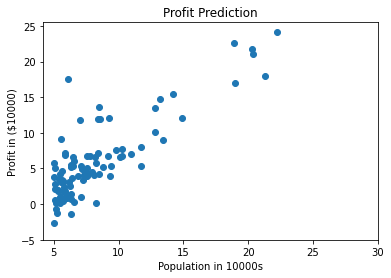

In [153]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,35,step = 5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population in 10000s")
plt.title("Profit Prediction")
plt.ylabel("Profit in ($10000)")
# plt.show()

In [154]:
# Compute the cost function J

def compute_cost(X,y,theta):
    m = len(y)
    J = 1/2/m*np.sum((np.dot(X,theta)-y)**2)
    return J


In [155]:
theta = np.zeros((2,1))
m= data.values.shape[0]
y = data.values[:,1].reshape(m,1)
X = np.append(np.ones((m,1)),data.values[:,0].reshape(m,1),axis=1).reshape((m,2))
compute_cost(X,y,theta)

32.072733877455676

In [156]:
# Gradient descent algorithm

def grad_descent(X,y,theta,alpha,num_iters):

    J_history = []

    for i in range(num_iters):
        theta = theta- 1/m*alpha*(np.dot(X.transpose(),(np.dot(X,theta)-y)))
        J_history.append(compute_cost(X,y,theta))

    return theta,J_history

In [157]:
theta,J_history = grad_descent(X,y,theta,0.01,1500)
print(theta.shape)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

(2, 1)
h(x) =-3.63 + 1.17x1


In [158]:
from mpl_toolkits.mplot3d import Axes3D

In [159]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=compute_cost(X,y,t)

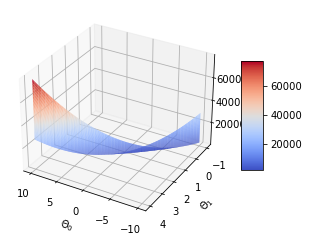

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

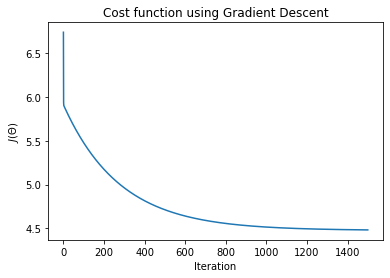

In [161]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit Prediction')

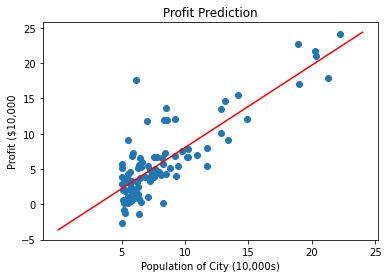

In [162]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

In [163]:
def predict(x,theta):
    return np.dot(x,theta)


In [164]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str((predict1)))

For population = 35,000, we predict a profit of $[4519.7678677]


In [165]:
# Multivariate linear regression

data2=pd.read_csv("Multi_linear.txt", header=None)

In [166]:
data2.head()


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [167]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


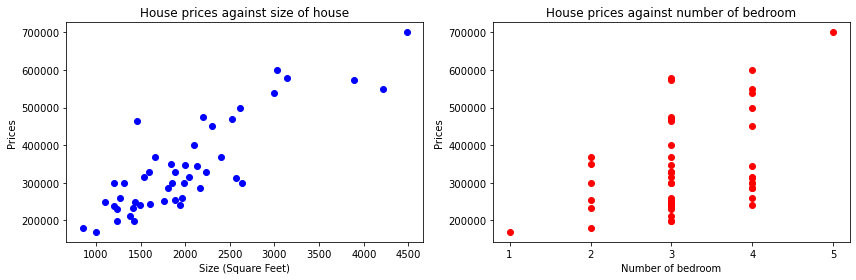

In [168]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

# Enhance layout
plt.tight_layout()

In [169]:
def featureNormalisation(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    print(mean)
    X = (X-mean)/std

    return mean,std,X

In [170]:
data2.values

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900],
       [  1534,      3, 314900],
       [  1427,      3, 198999],
       [  1380,      3, 212000],
       [  1494,      3, 242500],
       [  1940,      4, 239999],
       [  2000,      3, 347000],
       [  1890,      3, 329999],
       [  4478,      5, 699900],
       [  1268,      3, 259900],
       [  2300,      4, 449900],
       [  1320,      2, 299900],
       [  1236,      3, 199900],
       [  2609,      4, 499998],
       [  3031,      4, 599000],
       [  1767,      3, 252900],
       [  1888,      2, 255000],
       [  1604,      3, 242900],
       [  1962,      4, 259900],
       [  3890,      3, 573900],
       [  1100,      3, 249900],
       [  1458,      3, 464500],
       [  2526,      3, 469000],
       [  2200,      3, 475000],
       [  2637,      3, 299900],
       [  

In [171]:
m = data2.shape[0]
X2 = data2.values[:,0:2].reshape(m,2)
y = data2.values[:,2:].reshape(m,1)

In [172]:
mean_X2,std_X2,X2 = featureNormalisation(X2)
X = np.append(np.ones((m,1)),X2,axis=1)
theta = np.zeros((3,1))

[2000.68085106    3.17021277]


In [175]:
compute_cost(X,y,theta)

65591548106.45744

In [178]:
theta2, J_history2 = grad_descent(X,y,theta,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

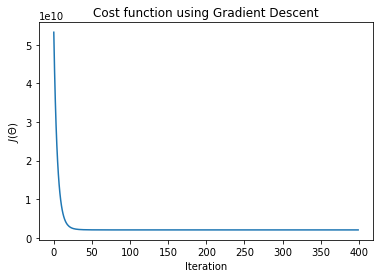

In [179]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [192]:
#feature normalisation of x values
mean,std,x_sample = featureNormalisation(np.array([1650,3]))
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str((predict3)))

826.5
For size of house = 1650, Number of bedroom = 3, we predict a house value of $[456438.80913176]
